In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import config

import seaborn as sns
import matplotlib.pyplot as plt
%matploblib inline

UsageError: Line magic function `%matploblib` not found.


# Pull data from SQL ---> DataFrame

In [3]:
database_cnx.close()
database_cursor.close()

NameError: name 'database_cnx' is not defined

In [4]:
database_cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database = config.DB_NAME
)
database_cursor = database_cnx.cursor(buffered=True)
print(database_cursor)

CMySQLCursorBuffered: (Nothing executed yet)


### nice function, reads SQL query into dataframe. no SQLalchemy required

In [2]:
def read_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute( query )
        names = [ x[0] for x in cursor.description]
        rows = cursor.fetchall()
        return pd.DataFrame( rows, columns=names)
    finally:
        if cursor is not None:
            cursor.close()

In [15]:
query = '''
SELECT * FROM world_bank_index

'''

In [16]:
wbi = read_query(database_cnx, query)

In [17]:
wbi.head()

Country  Regulatory_Quality  Political_Stability  Accountability  \
0  Afghanistan           -1.327690            -2.671050       -1.039840   
1      Albania            0.189022             0.344645        0.169949   
2      Algeria           -1.171880            -1.097530       -0.863169   
3      Andorra            0.871443             1.413420        1.176540   
4       Angola           -1.001380            -0.315899       -1.142930   

   Rule_of_Law  
0    -1.498190  
1    -0.328867  
2    -0.857401  
3     1.577920  
4    -1.087320

In [22]:
wbi.columns

Index(['Country', 'Regulatory_Quality', 'Political_Stability',
       'Accountability', 'Rule_of_Law'],
      dtype='object')

In [23]:
wbi = wbi.rename(columns={'Country':'country','Regulatory_Quality':'regulatory_quality',
                   'Political_Stability':'political_stability','Accountability':'accountability',
                   'Rule_of_Law':'rule_of_law'})

In [24]:
wbi.head()

country  regulatory_quality  political_stability  accountability  \
0  Afghanistan           -1.327690            -2.671050       -1.039840   
1      Albania            0.189022             0.344645        0.169949   
2      Algeria           -1.171880            -1.097530       -0.863169   
3      Andorra            0.871443             1.413420        1.176540   
4       Angola           -1.001380            -0.315899       -1.142930   

   rule_of_law  
0    -1.498190  
1    -0.328867  
2    -0.857401  
3     1.577920  
4    -1.087320

In [18]:
query = '''
SELECT * FROM final
'''

In [19]:
main = read_query(database_cnx, query)

In [20]:
main.head()

country       gdp_usd  population  CPI  rank  GI_risk    co2_mmt  \
0  Afghanistan  5.963890e+10  34600200.0   16   172       10    8.54149   
1      Albania  3.087580e+10   2927090.0   36    99       35    4.22116   
2      Algeria  5.536240e+11  40563900.0   35   105       35  138.72300   
3       Angola  1.768130e+11  28852900.0   19   165       22   21.41700   
4    Argentina  7.994760e+11  43897900.0   40    85       35  194.10000   

   gdp_capita  
0     1723.66  
1    10548.30  
2    13648.20  
3     6128.08  
4    18212.20

In [21]:
print( len(main),len(wbi))

167 202


In [25]:
main.merge(wbi,on='country',how='outer')

country       gdp_usd    population   CPI   rank  \
0                       Afghanistan  5.963890e+10  3.460020e+07  16.0  172.0   
1                           Albania  3.087580e+10  2.927090e+06  36.0   99.0   
2                           Algeria  5.536240e+11  4.056390e+07  35.0  105.0   
3                            Angola  1.768130e+11  2.885290e+07  19.0  165.0   
4                         Argentina  7.994760e+11  4.389790e+07  40.0   85.0   
5                           Armenia  2.344670e+10  2.921300e+06  35.0  105.0   
6                         Australia  1.088900e+12  2.424600e+07  77.0   13.0   
7                           Austria  3.831180e+11  8.745720e+06  76.0   14.0   
8                        Azerbaijan  1.552090e+11  9.713940e+06  25.0  152.0   
9                           Bahrain  6.107620e+10  1.348410e+06  36.0   99.0   
10                       Bangladesh  5.699850e+11  1.629160e+08  26.0  149.0   
11                         Barbados  4.731870e+09  2.848870e+05  68.0   25.0   
12                          Belarus  1.557620e+11  9.471700e+06  44.0   70.0   
13                          Belgium  4.647100e+11  1.133650e+07  75.0   17.0   
14                            Benin  2.140330e+10  1.088540e+07  40.0   85.0   
15                           Bhutan  5.877710e+09  7.969580e+05  68.0   25.0   
16                          Bolivia  7.153140e+10  1.088860e+07  29.0  132.0   
17           Bosnia and Herzegovina  3.956050e+10  3.528410e+06  38.0   89.0   
18                         Botswana  3.393380e+10  2.250510e+06  61.0   34.0   
19                           Brazil  2.870230e+12  2.078520e+08  35.0  105.0   
20                         Bulgaria  1.320510e+11  7.121330e+06  42.0   77.0   
21                     Burkina Faso  2.999470e+10  1.866920e+07  41.0   78.0   
22                          Burundi  7.130170e+09  1.054730e+07  17.0  170.0   
23                         Cambodia  5.346540e+10  1.575720e+07  20.0  161.0   
24                         Cameroon  7.698730e+10  2.345920e+07  25.0  152.0   
25                           Canada  1.521620e+12  3.605180e+07  81.0    9.0   
26         Central African Republic  2.824990e+09  4.621060e+06  26.0  149.0   
27                             Chad  2.630620e+10  1.446450e+07  19.0  165.0   
28                            Chile  3.964490e+11  1.792800e+07  67.0   27.0   
29                            China  1.940000e+13  1.404130e+09  39.0   87.0   
..                              ...           ...           ...   ...    ...   
186         Jersey, Channel Islands           NaN           NaN   NaN    NaN   
187                        Kiribati           NaN           NaN   NaN    NaN   
188                Korea, Dem. Rep.           NaN           NaN   NaN    NaN   
189                     Korea, Rep.           NaN           NaN   NaN    NaN   
190                 Kyrgyz Republic           NaN           NaN   NaN    NaN   
191                         Lao PDR           NaN           NaN   NaN    NaN   
192                   Liechtenstein           NaN           NaN   NaN    NaN   
193                Macao SAR, China           NaN           NaN   NaN    NaN   
194                  Macedonia, FYR           NaN           NaN   NaN    NaN   
195                Marshall Islands           NaN           NaN   NaN    NaN   
196           Micronesia, Fed. Sts.           NaN           NaN   NaN    NaN   
197                           Nauru           NaN           NaN   NaN    NaN   
198                           Palau           NaN           NaN   NaN    NaN   
199                     Puerto Rico           NaN           NaN   NaN    NaN   
200              Russian Federation           NaN           NaN   NaN    NaN   
201                           Samoa           NaN           NaN   NaN    NaN   
202           São Tomé and Principe           NaN           NaN   NaN    NaN   
203                 Slovak Republic           NaN           NaN   NaN    NaN   
204                     Sout

In [27]:
test = main.merge(wbi,on='country',how='inner')

In [28]:
test

country       gdp_usd    population  CPI  rank  GI_risk  \
0                 Afghanistan  5.963890e+10  3.460020e+07   16   172       10   
1                     Albania  3.087580e+10  2.927090e+06   36    99       35   
2                     Algeria  5.536240e+11  4.056390e+07   35   105       35   
3                      Angola  1.768130e+11  2.885290e+07   19   165       22   
4                   Argentina  7.994760e+11  4.389790e+07   40    85       35   
5                     Armenia  2.344670e+10  2.921300e+06   35   105       35   
6                   Australia  1.088900e+12  2.424600e+07   77    13       71   
7                     Austria  3.831180e+11  8.745720e+06   76    14       71   
8                  Azerbaijan  1.552090e+11  9.713940e+06   25   152       35   
9                     Bahrain  6.107620e+10  1.348410e+06   36    99       35   
10                 Bangladesh  5.699850e+11  1.629160e+08   26   149       22   
11                   Barbados  4.731870e+09  2.848870e+05   68    25       71   
12                    Belarus  1.557620e+11  9.471700e+06   44    70       47   
13                    Belgium  4.647100e+11  1.133650e+07   75    17       71   
14                      Benin  2.140330e+10  1.088540e+07   40    85       35   
15                     Bhutan  5.877710e+09  7.969580e+05   68    25       71   
16                    Bolivia  7.153140e+10  1.088860e+07   29   132       35   
17     Bosnia and Herzegovina  3.956050e+10  3.528410e+06   38    89       35   
18                   Botswana  3.393380e+10  2.250510e+06   61    34       59   
19                     Brazil  2.870230e+12  2.078520e+08   35   105       35   
20                   Bulgaria  1.320510e+11  7.121330e+06   42    77       35   
21               Burkina Faso  2.999470e+10  1.866920e+07   41    78       47   
22                    Burundi  7.130170e+09  1.054730e+07   17   170       22   
23                   Cambodia  5.346540e+10  1.575720e+07   20   161       22   
24                   Cameroon  7.698730e+10  2.345920e+07   25   152       35   
25                     Canada  1.521620e+12  3.605180e+07   81     9       71   
26   Central African Republic  2.824990e+09  4.621060e+06   26   149       22   
27                       Chad  2.630620e+10  1.446450e+07   19   165       22   
28                      Chile  3.964490e+11  1.792800e+07   67    27       59   
29                      China  1.940000e+13  1.404130e+09   39    87       47   
..                        ...           ...           ...  ...   ...      ...   
123                  Slovenia  6.047040e+10  2.065900e+06   60    36       71   
124           Solomon Islands  1.043290e+09  5.994450e+05   44    70       59   
125                   Somalia  6.877670e+09  1.434750e+07   10   180       22   
126              South Africa  6.725660e+11  5.608860e+07   43    73       47   
127                     Spain  1.537470e+12  4.649500e+07   58    41       47   
128                 Sri Lanka  2.377700e+11  2.078800e+07   38    89       35   
129                     Sudan  1.988750e+11  3.962650e+07   16   172       22   
130                  Suriname  7.592770e+09  5.581170e+05   43    73       35   
131                 Swaziland  1.034720e+10  1.343070e+06   38    89       35   
132                    Sweden  4.517820e+11  9.941100e+06   85     3       83   
133               Switzerland  4.575100e+11  8.419550e+06   85     3       83   
134                Tajikistan  2.254470e+10  8.733970e+06   25   152       22   
135                  Tanzania  1.365260e+11  5.565890e+07   36    99       35   
136                  Thailand  1.060970e+12  6.888250e+07   36    99       35   
137               Timor-Leste  6.861370e+09  1.269060e+06   35   105       35   
138                      Togo  1.105410e+10  7.610300e+06   30   129       35   
139       Trinidad and Tobago  4.123270e+10  1.363620e+06   41    78       35   
140                   Tunisia  1.202060e+11  1.139960

In [30]:
# test.to_csv('merged')

done


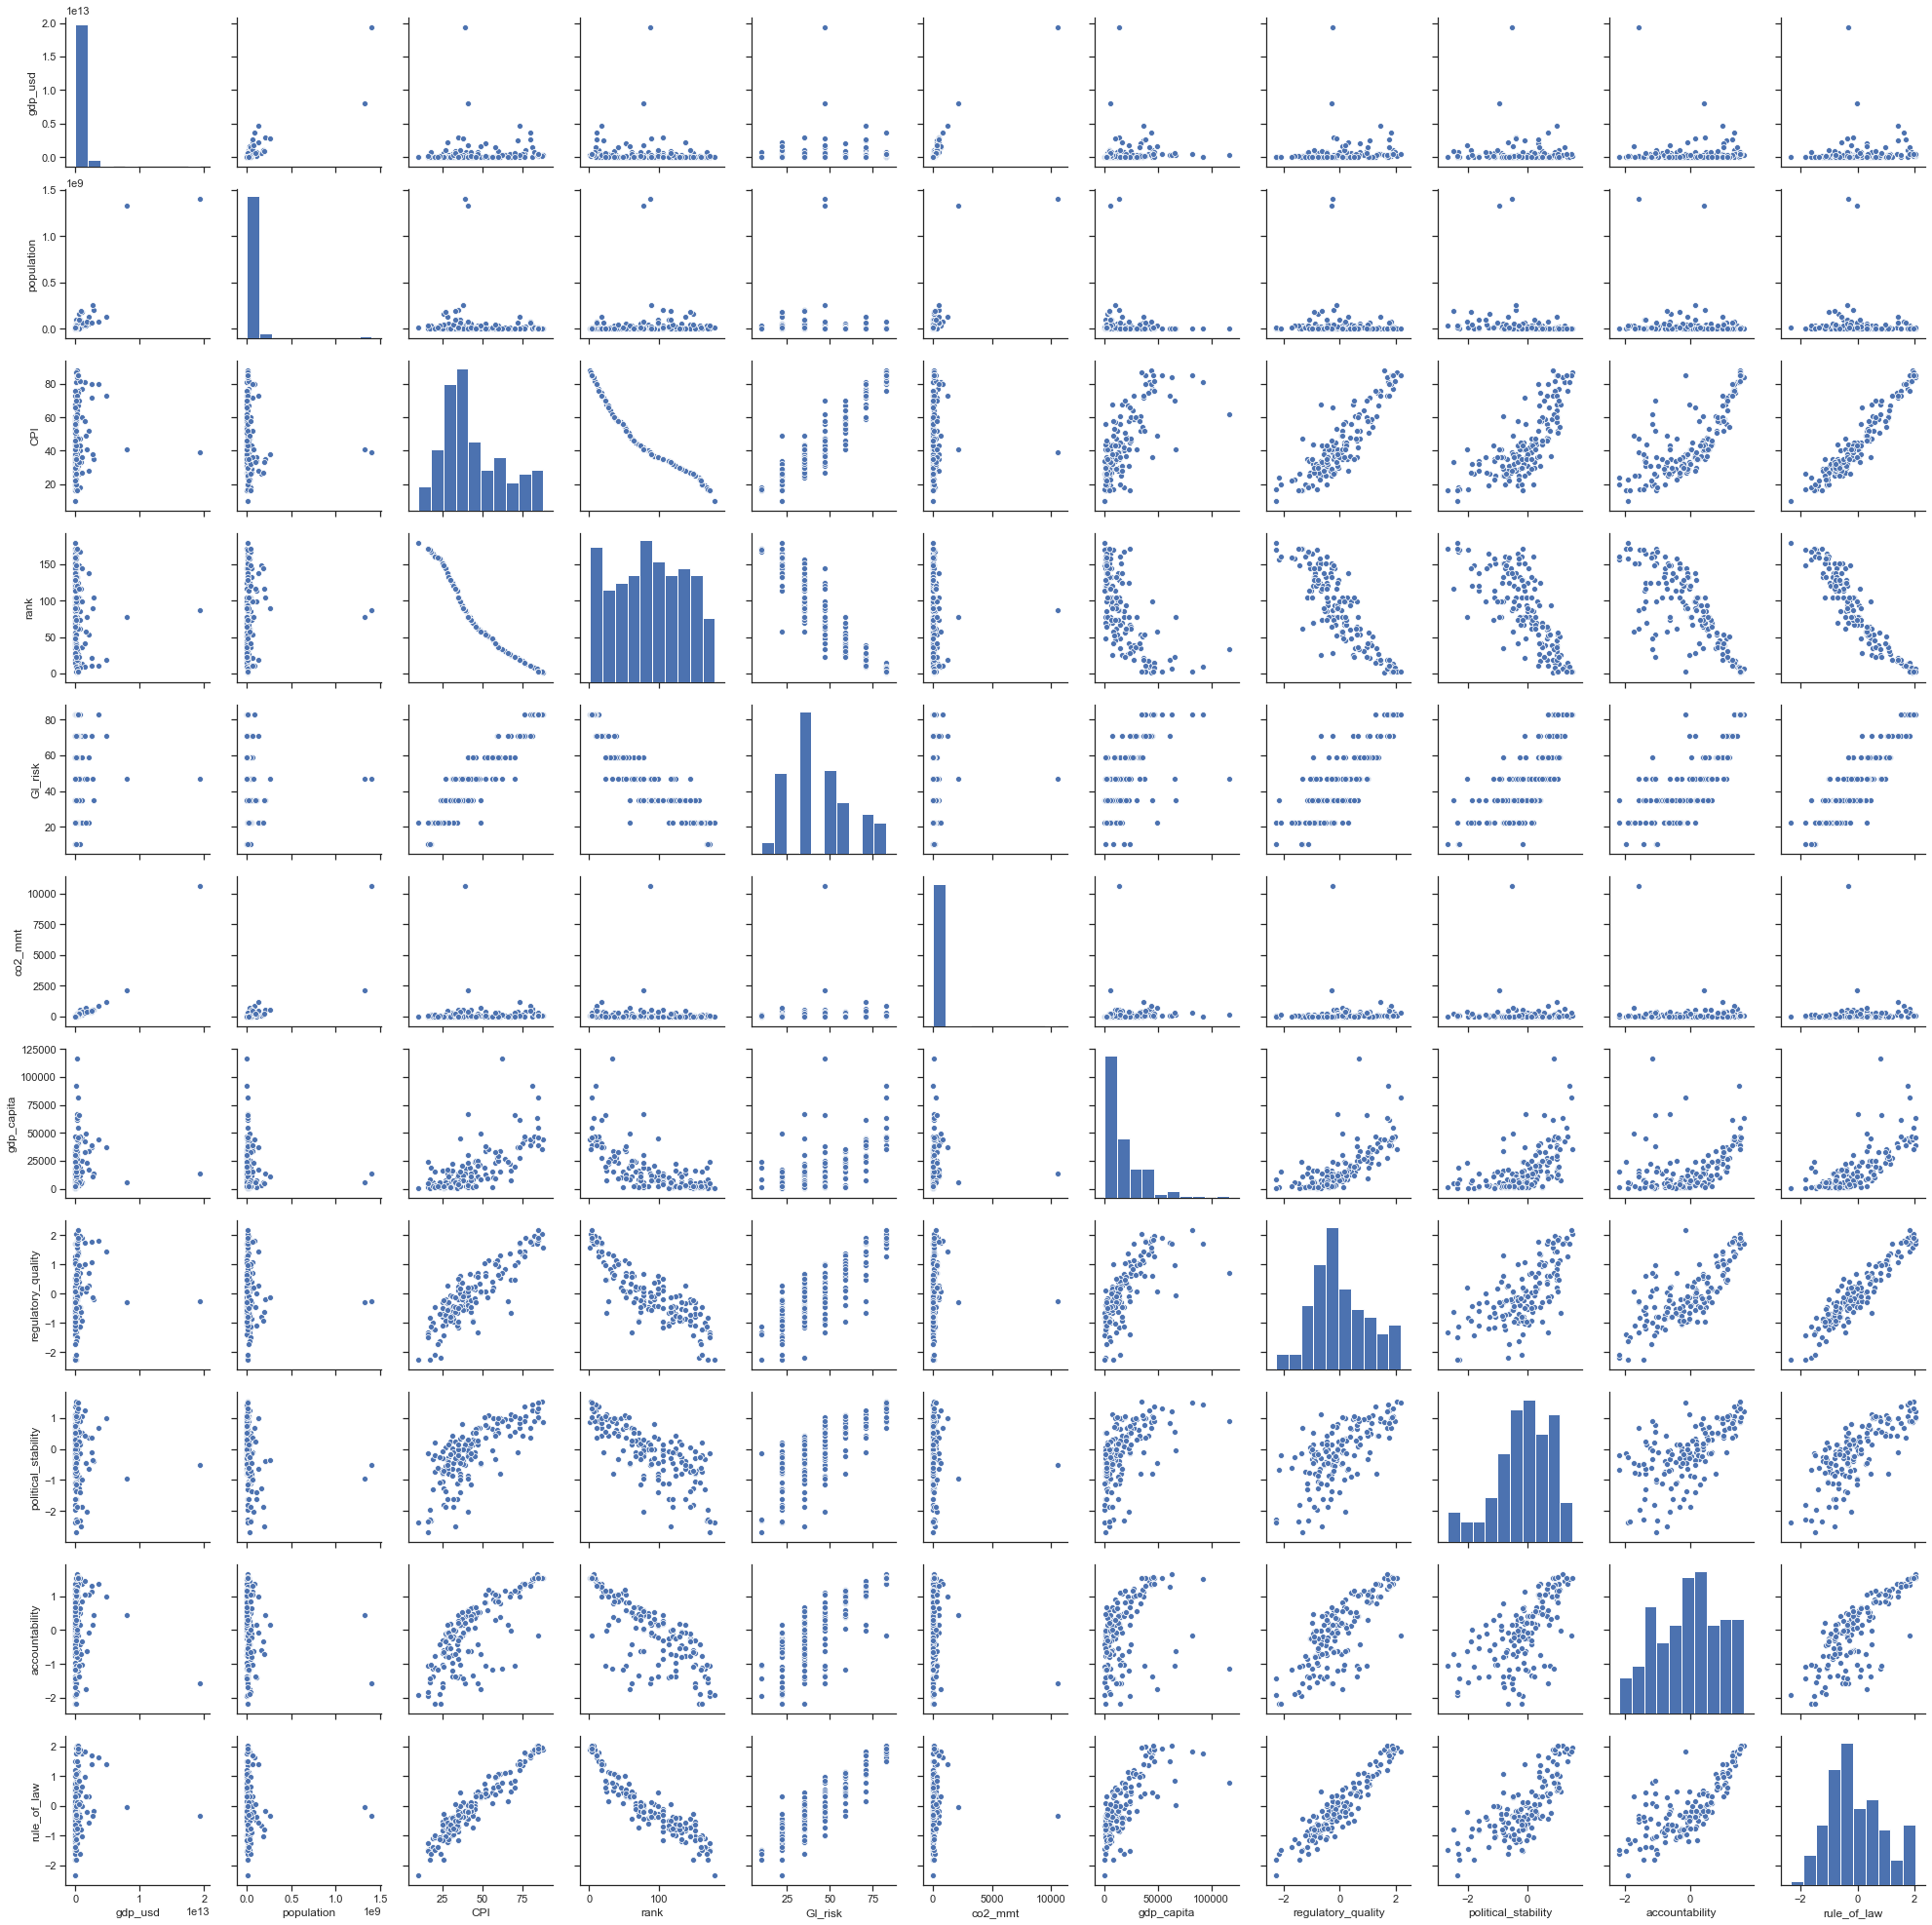

In [32]:

# sns.set(style="ticks")

# # df = sns.load_dataset("iris")
sns.pairplot(test)
print('done')

In [34]:
test.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law'],
      dtype='object')

In [44]:
def f(row):
    return row['co2_mmt']/row['population'] * 1000

In [45]:
test['co2_kg_capita'] = test.apply(lambda row: f(row), axis=1)

In [47]:
test.head()

country       gdp_usd  population  CPI  rank  GI_risk    co2_mmt  \
0  Afghanistan  5.963890e+10  34600200.0   16   172       10    8.54149   
1      Albania  3.087580e+10   2927090.0   36    99       35    4.22116   
2      Algeria  5.536240e+11  40563900.0   35   105       35  138.72300   
3       Angola  1.768130e+11  28852900.0   19   165       22   21.41700   
4    Argentina  7.994760e+11  43897900.0   40    85       35  194.10000   

   gdp_capita  regulatory_quality  political_stability  accountability  \
0     1723.66           -1.327690            -2.671050       -1.039840   
1    10548.30            0.189022             0.344645        0.169949   
2    13648.20           -1.171880            -1.097530       -0.863169   
3     6128.08           -1.001380            -0.315899       -1.142930   
4    18212.20           -0.469625             0.204626        0.492563   

   rule_of_law  co2_mmt_capita  co2_kg_capita  
0    -1.498190    2.468624e-07       0.000247  
1    -0.328867    1.442101e-06       0.001442  
2    -0.857401    3.419863e-06       0.003420  
3    -1.087320    7.422824e-07       0.000742  
4    -0.393606    4.421624e-06       0.004422

In [66]:
test.to_csv('merged_new')

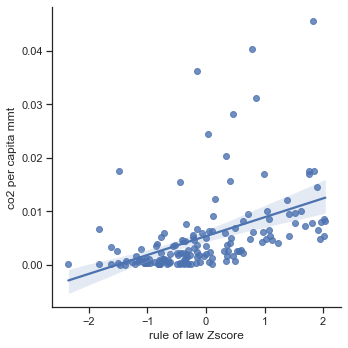

In [48]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="rule_of_law", y="co2_kg_capita",
               truncate=True, height=5, data=test)

# Use more informative axis labels than are provided by default
g.set_axis_labels("rule of law Zscore", "co2 per capita mmt")

In [61]:
test.sort_values(['country','co2_kg_capita'],ascending=False)

country       gdp_usd    population  CPI  rank  GI_risk  \
152                  Zimbabwe  2.944400e+10  1.615800e+07   22   160       22   
151                    Zambia  5.935340e+10  1.661630e+07   35   105       35   
150                   Vietnam  5.407640e+11  9.452930e+07   33   117       35   
149                   Vanuatu  6.721590e+08  2.704690e+05   46    64       47   
148                Uzbekistan  1.883910e+11  3.142800e+07   23   158       22   
147                   Uruguay  6.778700e+10  3.444120e+06   70    23       59   
146            United Kingdom  2.561880e+12  6.568790e+07   80    11       71   
145      United Arab Emirates  6.147660e+11  9.286080e+06   70    23       47   
144                   Ukraine  3.209370e+11  4.280000e+07   32   120       35   
143                    Uganda  7.599860e+10  4.155340e+07   26   149       22   
142              Turkmenistan  8.678200e+10  5.658470e+06   20   161       22   
141                    Turkey  1.815580e+12  7.961510e+07   41    78       47   
140                   Tunisia  1.202060e+11  1.139960e+07   43    73       47   
139       Trinidad and Tobago  4.123270e+10  1.363620e+06   41    78       35   
138                      Togo  1.105410e+10  7.610300e+06   30   129       35   
137               Timor-Leste  6.861370e+09  1.269060e+06   35   105       35   
136                  Thailand  1.060970e+12  6.888250e+07   36    99       35   
135                  Tanzania  1.365260e+11  5.565890e+07   36    99       35   
134                Tajikistan  2.254470e+10  8.733970e+06   25   152       22   
133               Switzerland  4.575100e+11  8.419550e+06   85     3       83   
132                    Sweden  4.517820e+11  9.941100e+06   85     3       83   
131                 Swaziland  1.034720e+10  1.343070e+06   38    89       35   
130                  Suriname  7.592770e+09  5.581170e+05   43    73       35   
129                     Sudan  1.988750e+11  3.962650e+07   16   172       22   
128                 Sri Lanka  2.377700e+11  2.078800e+07   38    89       35   
127                     Spain  1.537470e+12  4.649500e+07   58    41       47   
126              South Africa  6.725660e+11  5.608860e+07   43    73       47   
125                   Somalia  6.877670e+09  1.434750e+07   10   180       22   
124           Solomon Islands  1.043290e+09  5.994450e+05   44    70       59   
123                  Slovenia  6.047040e+10  2.065900e+06   60    36       71   
..                        ...           ...           ...  ...   ...      ...   
29                      China  1.940000e+13  1.404130e+09   39    87       47   
28                      Chile  3.964490e+11  1.792800e+07   67    27       59   
27                       Chad  2.630620e+10  1.446450e+07   19   165       22   
26   Central African Republic  2.824990e+09  4.621060e+06   26   149       22   
25                     Canada  1.521620e+12  3.605180e+07   81     9       71   
24                   Cameroon  7.698730e+10  2.345920e+07   25   152       35   
23                   Cambodia  5.346540e+10  1.575720e+07   20   161       22   
22                    Burundi  7.130170e+09  1.054730e+07   17   170       22   
21               Burkina Faso  2.999470e+10  1.866920e+07   41    78       47   
20                   Bulgaria  1.320510e+11  7.121330e+06   42    77       35   
19                     Brazil  2.870230e+12  2.078520e+08   35   105       35   
18                   Botswana  3.393380e+10  2.250510e+06   61    34       59   
17     Bosnia and Herzegovina  3.956050e+10  3.528410e+06   38    89       35   
16                    Bolivia  7.153140e+10  1.088860e+07   29   132       35   
15                     Bhutan  5.877710e+09  7.969580e+05   68    25       71   
14                      Benin  2.140330e+10  1.088540e+07   40    85       35   
13                    Belgium  4.647100e+11  1.133650e+07   75    17       71   
12                    Belarus  1.557620e+11  9.471700

In [ ]:
test.sort_values(['rule_of_law','co2_kg_capita'],ascending=False).groupby('')

In [5]:
# df.sort_values(['job','count'],ascending=False).groupby('job').head(3)


# tes

In [ ]:
df_agg = test.groupby(['job','source']).agg({'count':sum})

In [ ]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="rule_of_law", y="co2_kg_capita",
               truncate=True, height=5, data=test)

# Use more informative axis labels than are provided by default
g.set_axis_labels("rule of law Zscore", "co2 per capita mmt")

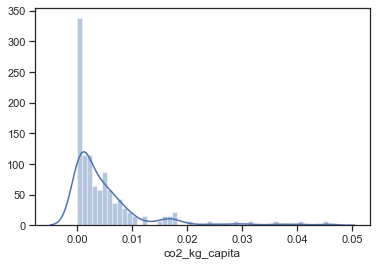

In [50]:

ax = sns.distplot(test['co2_kg_capita'], bins=50)

In [51]:
merged = test

In [53]:
merged.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law', 'co2_mmt_capita', 'co2_kg_capita'],
      dtype='object')

# let's pull down kyle's new resource data

In [8]:
query = '''
SELECT * FROM resource_data
'''

In [6]:
# connection's here, let's call the function again

In [72]:
res = read_query(database_cnx, query)

In [73]:
res.head() # looking good

country  GDP_Ag_and_Forest  petro_income  resource_income
0          Afghanistan           21.08110      0.000824          0.62586
1              Albania           19.85000      0.853421          1.04950
2              Algeria           12.21280     10.046100         12.30340
3               Angola            9.83117     10.168700         10.74620
4  Antigua and Barbuda            1.54383      0.000000          0.00000

In [74]:
# # let's drop petro_income, because it's included in resource_income
# res = res.drop('petro_income',axis=1)

In [14]:
res.head()

country  GDP_Ag_and_Forest  resource_income
0          Afghanistan           21.08110          0.62586
1              Albania           19.85000          1.04950
2              Algeria           12.21280         12.30340
3               Angola            9.83117         10.74620
4  Antigua and Barbuda            1.54383          0.00000

In [75]:
# i saved the merged DF before i exited yesterday, so let's load the CSV
merged = pd.read_csv('merged_new')

In [76]:
merged.columns # some indexing redundancy.. we'll drop the extra index column

Index(['Unnamed: 0', 'country', 'gdp_usd', 'population', 'CPI', 'rank',
       'GI_risk', 'co2_mmt', 'gdp_capita', 'regulatory_quality',
       'political_stability', 'accountability', 'rule_of_law',
       'co2_mmt_capita', 'co2_kg_capita'],
      dtype='object')

In [77]:
merged = merged.drop('Unnamed: 0',axis=1)
merged.head() 

country       gdp_usd  population  CPI  rank  GI_risk    co2_mmt  \
0  Afghanistan  5.963890e+10  34600200.0   16   172       10    8.54149   
1      Albania  3.087580e+10   2927090.0   36    99       35    4.22116   
2      Algeria  5.536240e+11  40563900.0   35   105       35  138.72300   
3       Angola  1.768130e+11  28852900.0   19   165       22   21.41700   
4    Argentina  7.994760e+11  43897900.0   40    85       35  194.10000   

   gdp_capita  regulatory_quality  political_stability  accountability  \
0     1723.66           -1.327690            -2.671050       -1.039840   
1    10548.30            0.189022             0.344645        0.169949   
2    13648.20           -1.171880            -1.097530       -0.863169   
3     6128.08           -1.001380            -0.315899       -1.142930   
4    18212.20           -0.469625             0.204626        0.492563   

   rule_of_law  co2_mmt_capita  co2_kg_capita  
0    -1.498190    2.468624e-07       0.000247  
1    -0.328867    1.442101e-06       0.001442  
2    -0.857401    3.419863e-06       0.003420  
3    -1.087320    7.422824e-07       0.000742  
4    -0.393606    4.421624e-06       0.004422

In [78]:
merged = merged.merge(res,on='country',how='inner') # nice. 144 rows still, so not bad for countries

In [79]:
merged.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law', 'co2_mmt_capita', 'co2_kg_capita',
       'GDP_Ag_and_Forest', 'petro_income', 'resource_income'],
      dtype='object')

In [81]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 17 columns):
country                144 non-null object
gdp_usd                144 non-null float64
population             144 non-null float64
CPI                    144 non-null int64
rank                   144 non-null int64
GI_risk                144 non-null int64
co2_mmt                144 non-null float64
gdp_capita             144 non-null float64
regulatory_quality     144 non-null float64
political_stability    144 non-null float64
accountability         144 non-null float64
rule_of_law            144 non-null float64
co2_mmt_capita         144 non-null float64
co2_kg_capita          144 non-null float64
GDP_Ag_and_Forest      144 non-null float64
petro_income           144 non-null float64
resource_income        144 non-null float64
dtypes: float64(13), int64(3), object(1)
memory usage: 20.2+ KB


KeyError: 'co2_dollar'

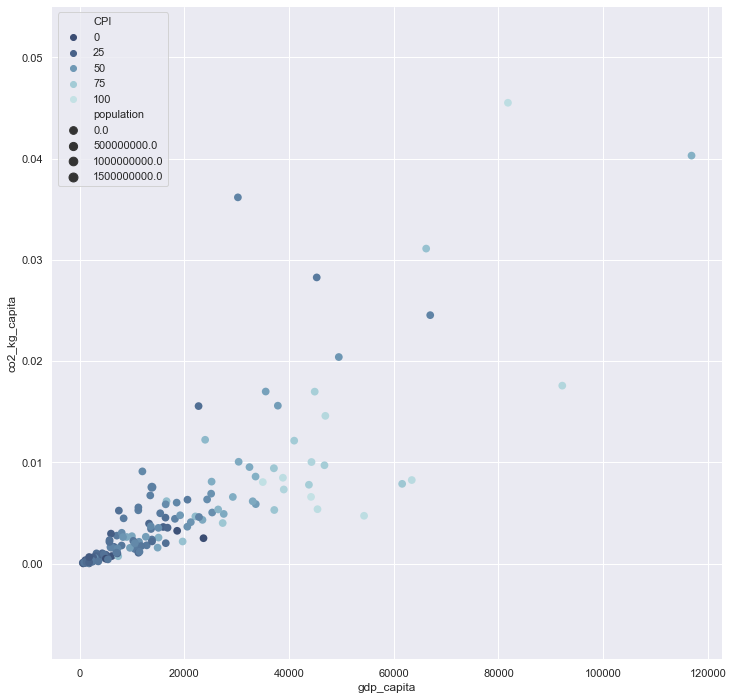

In [33]:
# thanks to seaborn for a nice example gallery


sns.set(style="darkgrid")

# Load the example iris dataset
# diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(12, 12))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="gdp_capita", y="co2_kg_capita",
                hue="CPI", size="population",
                palette="ch:r=-.2,d=.3_r",
                sizes=(60, 80), linewidth=0,
                data=merged, ax=ax)

In [70]:
merged.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law', 'co2_mmt_capita', 'co2_kg_capita',
       'GDP_Ag_and_Forest_x', 'resource_income_x', 'co2_dollar',
       'co2_kg_dollar', 'GDP_Ag_and_Forest_y', 'resource_income_y'],
      dtype='object')

In [34]:
merged.head()

country       gdp_usd  population  CPI  rank  GI_risk    co2_mmt  \
0  Afghanistan  5.963890e+10  34600200.0   16   172       10    8.54149   
1      Albania  3.087580e+10   2927090.0   36    99       35    4.22116   
2      Algeria  5.536240e+11  40563900.0   35   105       35  138.72300   
3       Angola  1.768130e+11  28852900.0   19   165       22   21.41700   
4    Argentina  7.994760e+11  43897900.0   40    85       35  194.10000   

   gdp_capita  regulatory_quality  political_stability  accountability  \
0     1723.66           -1.327690            -2.671050       -1.039840   
1    10548.30            0.189022             0.344645        0.169949   
2    13648.20           -1.171880            -1.097530       -0.863169   
3     6128.08           -1.001380            -0.315899       -1.142930   
4    18212.20           -0.469625             0.204626        0.492563   

   rule_of_law  co2_mmt_capita  co2_kg_capita  GDP_Ag_and_Forest  \
0    -1.498190    2.468624e-07       0.000247           21.08110   
1    -0.328867    1.442101e-06       0.001442           19.85000   
2    -0.857401    3.419863e-06       0.003420           12.21280   
3    -1.087320    7.422824e-07       0.000742            9.83117   
4    -0.393606    4.421624e-06       0.004422            6.26457   

   resource_income  
0          0.62586  
1          1.04950  
2         12.30340  
3         10.74620  
4          1.13494

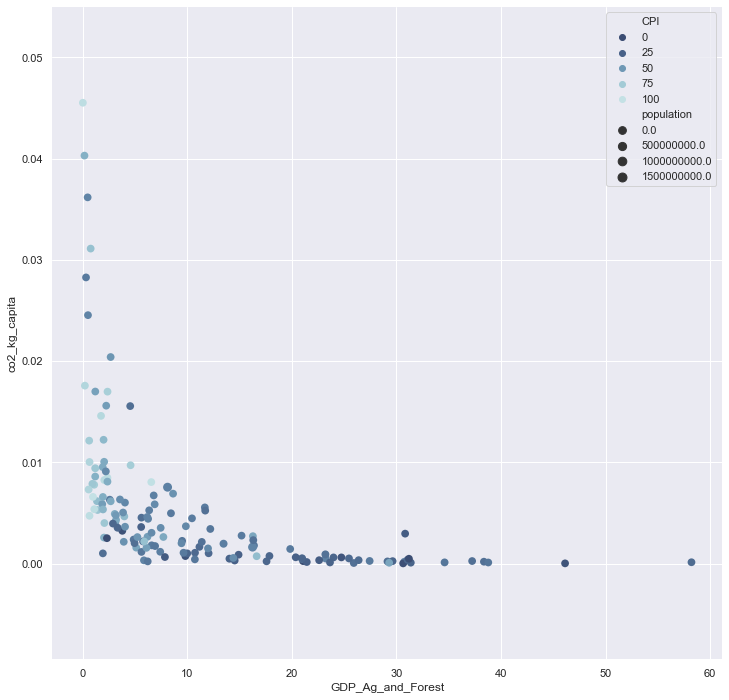

In [36]:
f, ax = plt.subplots(figsize=(12, 12))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="GDP_Ag_and_Forest", y="co2_kg_capita",
                hue="CPI", size="population",
                palette="ch:r=-.2,d=.3_r",
                sizes=(60, 80), linewidth=0,
                data=merged, ax=ax)

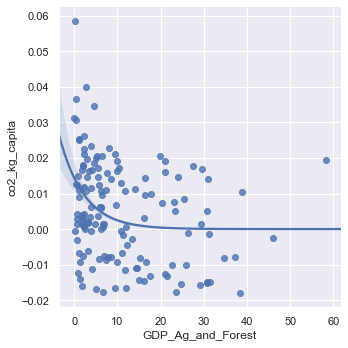

In [38]:
sns.lmplot(x="GDP_Ag_and_Forest", y="co2_kg_capita", data=merged,
                y_jitter=.02, logistic=True)

TypeError: lmplot() got an unexpected keyword argument 'figsize'

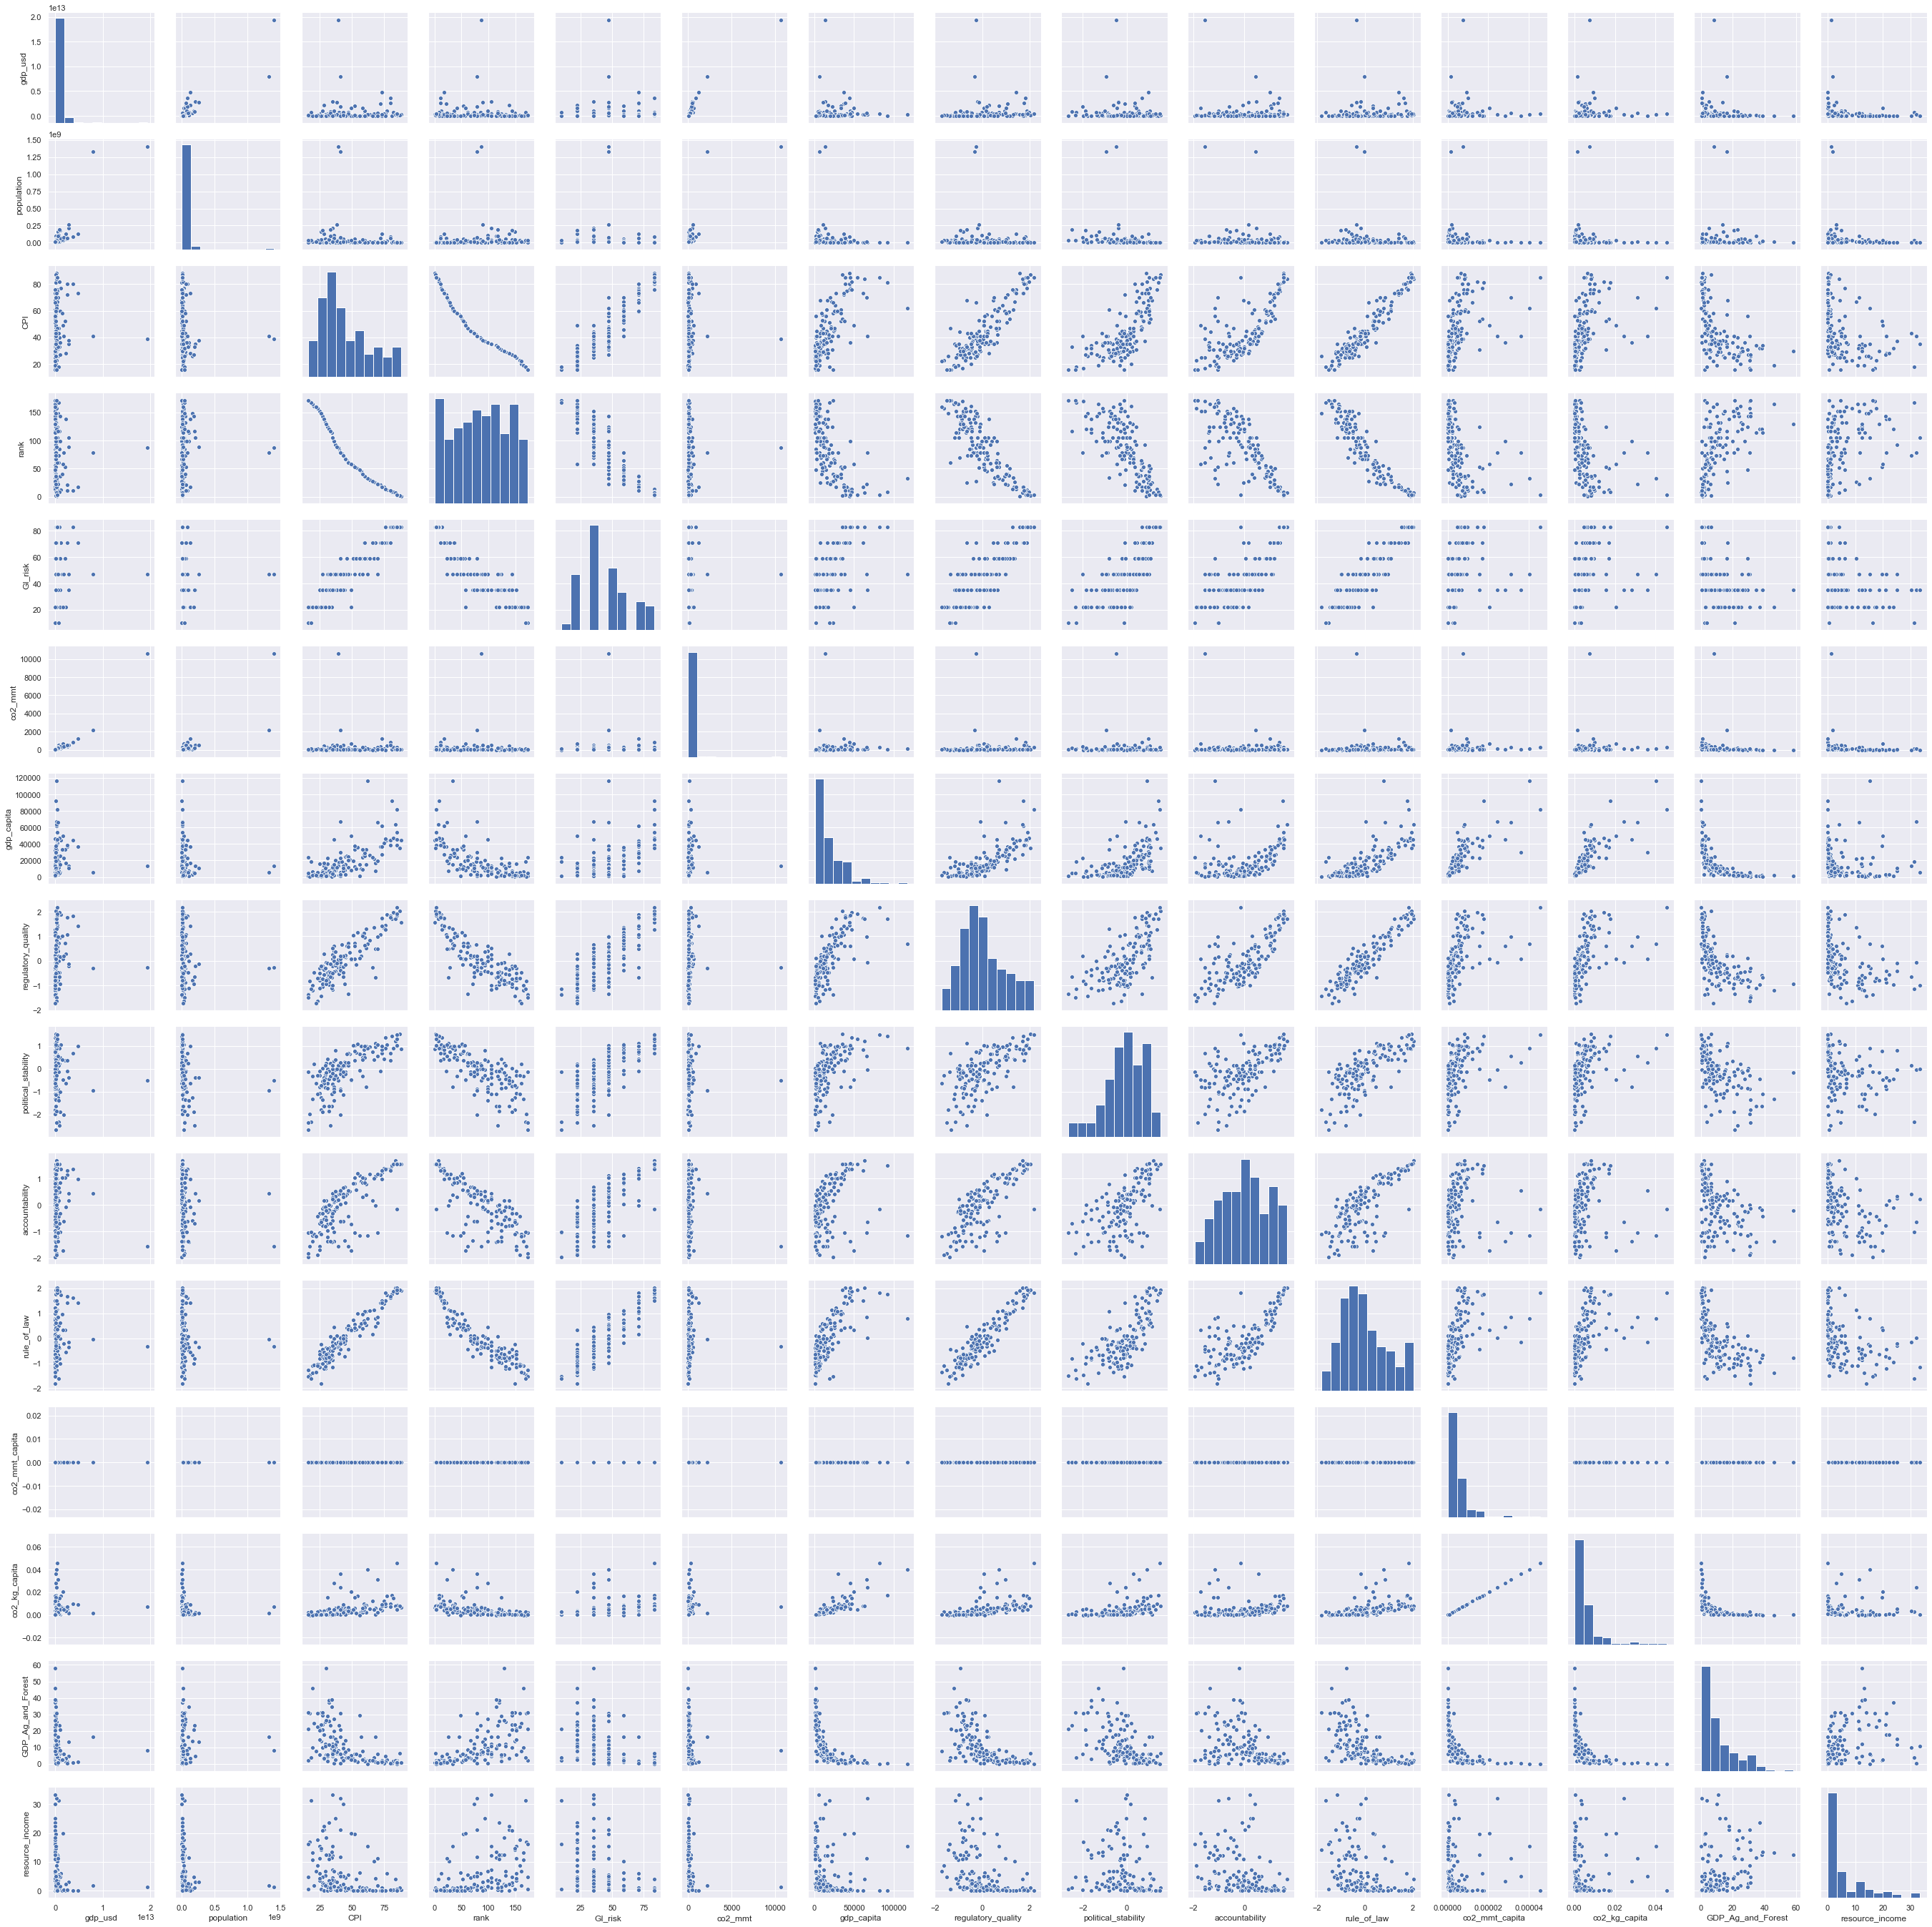

In [42]:
sns.pairplot(merged)

In [43]:
merged.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law', 'co2_mmt_capita', 'co2_kg_capita',
       'GDP_Ag_and_Forest', 'resource_income'],
      dtype='object')

In [ ]:
def f(row):
    return row['co2_mmt']

In [86]:
merged['co2_dollar'] = merged['co2_mmt']/merged['gdp_usd']

In [46]:
merged.head()

country       gdp_usd  population  CPI  rank  GI_risk    co2_mmt  \
0  Afghanistan  5.963890e+10  34600200.0   16   172       10    8.54149   
1      Albania  3.087580e+10   2927090.0   36    99       35    4.22116   
2      Algeria  5.536240e+11  40563900.0   35   105       35  138.72300   
3       Angola  1.768130e+11  28852900.0   19   165       22   21.41700   
4    Argentina  7.994760e+11  43897900.0   40    85       35  194.10000   

   gdp_capita  regulatory_quality  political_stability  accountability  \
0     1723.66           -1.327690            -2.671050       -1.039840   
1    10548.30            0.189022             0.344645        0.169949   
2    13648.20           -1.171880            -1.097530       -0.863169   
3     6128.08           -1.001380            -0.315899       -1.142930   
4    18212.20           -0.469625             0.204626        0.492563   

   rule_of_law  co2_mmt_capita  co2_kg_capita  GDP_Ag_and_Forest  \
0    -1.498190    2.468624e-07       0.000247           21.08110   
1    -0.328867    1.442101e-06       0.001442           19.85000   
2    -0.857401    3.419863e-06       0.003420           12.21280   
3    -1.087320    7.422824e-07       0.000742            9.83117   
4    -0.393606    4.421624e-06       0.004422            6.26457   

   resource_income    co2_dollar  
0          0.62586  1.432201e-10  
1          1.04950  1.367142e-10  
2         12.30340  2.505726e-10  
3         10.74620  1.211280e-10  
4          1.13494  2.427840e-10

In [ ]:
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, height=5, data=iris)

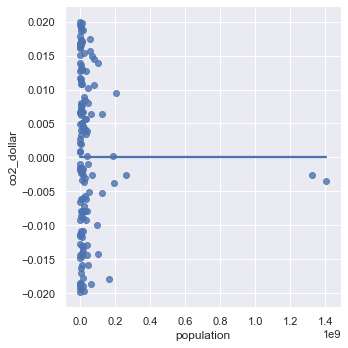

In [58]:
sns.lmplot(x="population", y="co2_dollar", data=merged,
                y_jitter=.02, truncate=True) # not much here

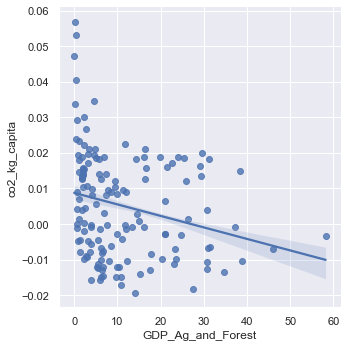

In [54]:
sns.lmplot(x="GDP_Ag_and_Forest", y="co2_kg_capita", data=merged,
                y_jitter=.02, truncate=True)

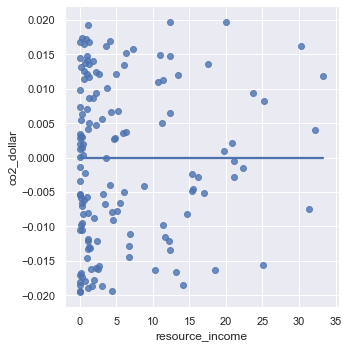

In [53]:
sns.lmplot(x="resource_income", y="co2_dollar", data=merged,
                y_jitter=.02, truncate=True)

In [ ]:
def narcissistic( value ):
    # separate digits
    digit_list = []
    lngth = len(str(value))
    for char in str(value):
        digit_list.append(int(char))
    dig_sum = 0
    for digit in digit_list:
        dig_sum += digit ** lngth
    if dig_sum == value:
        return True
    else:
        return False
        
        

In [ ]:
narcissistic(153)

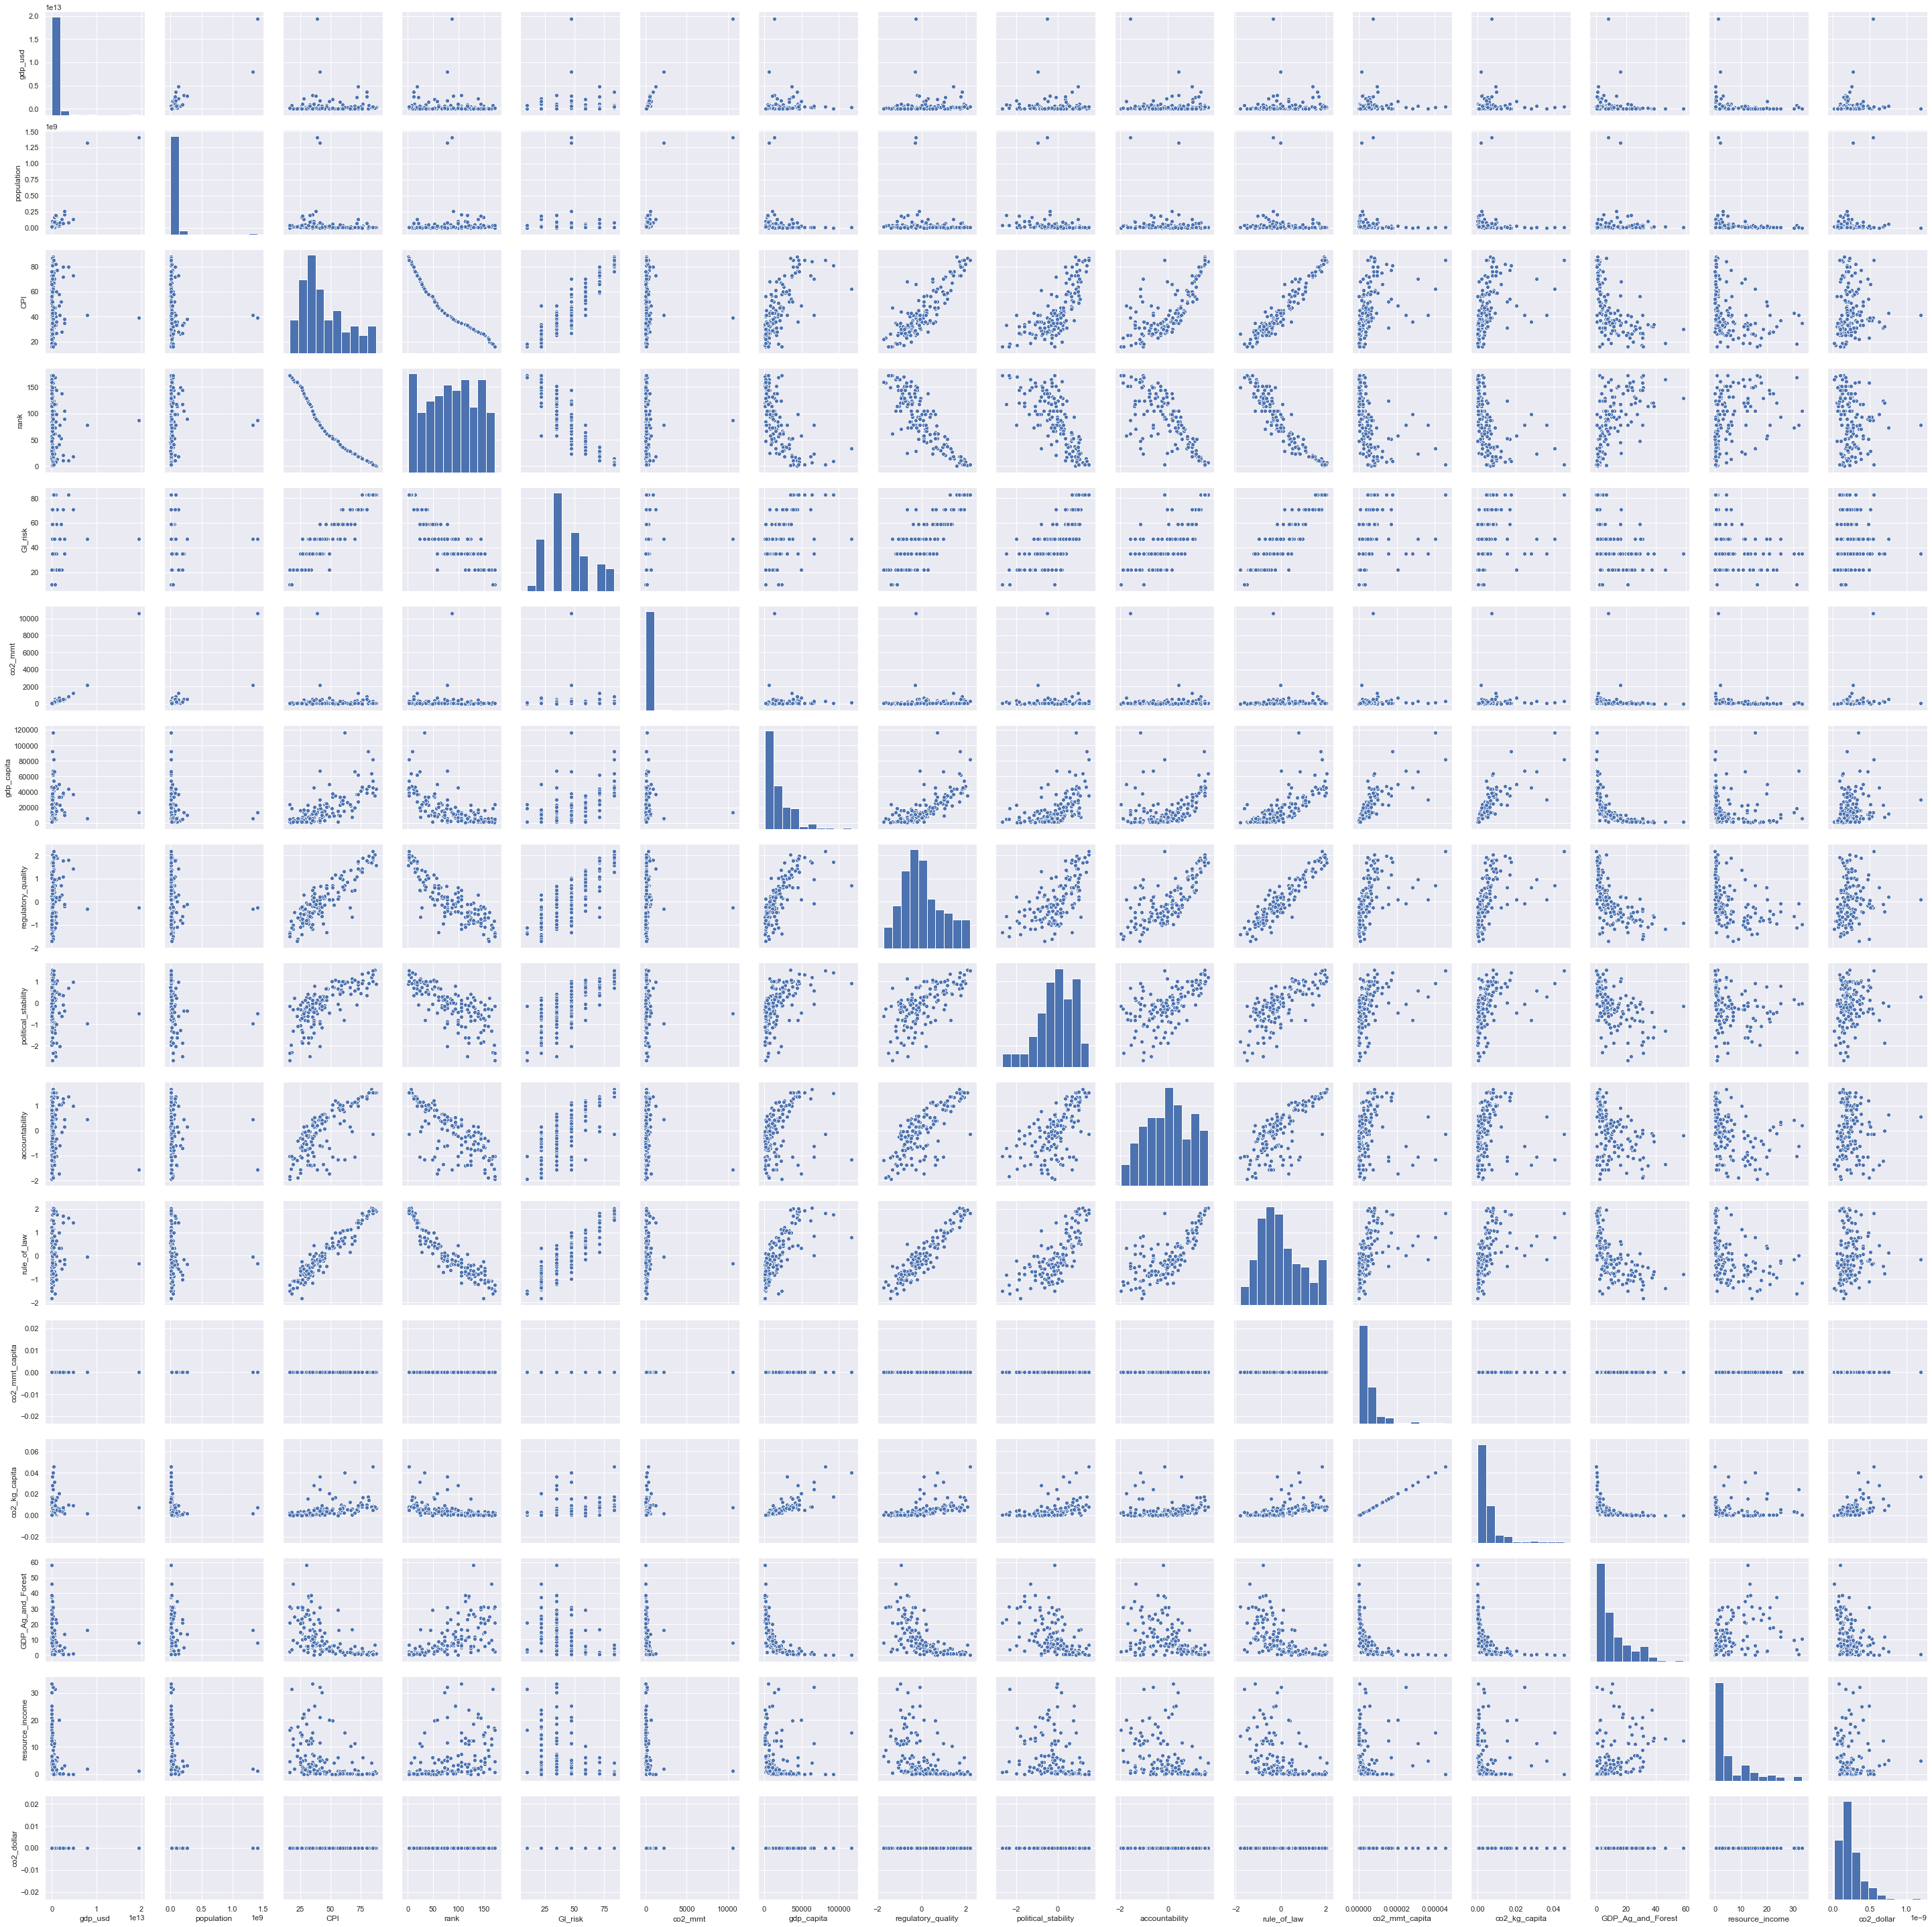

In [59]:
sns.pairplot(merged)

In [60]:
merged.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law', 'co2_mmt_capita', 'co2_kg_capita',
       'GDP_Ag_and_Forest', 'resource_income', 'co2_dollar'],
      dtype='object')

In [87]:
merged['co2_kg_dollar'] = merged['co2_dollar'] * 1000000000

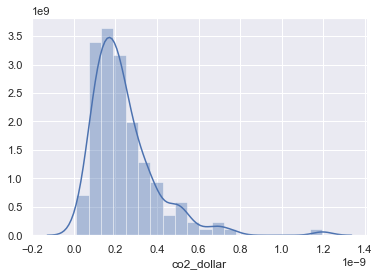

In [88]:
sns.distplot(merged['co2_dollar'])

In [89]:
merged.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law', 'co2_mmt_capita', 'co2_kg_capita',
       'GDP_Ag_and_Forest', 'petro_income', 'resource_income', 'co2_dollar',
       'co2_kg_dollar'],
      dtype='object')

In [66]:
sub = merged.drop(['rule_of_law','rank','GI_risk'],axis=1)

In [67]:
sub.head()

country       gdp_usd  population  CPI    co2_mmt  gdp_capita  \
0  Afghanistan  5.963890e+10  34600200.0   16    8.54149     1723.66   
1      Albania  3.087580e+10   2927090.0   36    4.22116    10548.30   
2      Algeria  5.536240e+11  40563900.0   35  138.72300    13648.20   
3       Angola  1.768130e+11  28852900.0   19   21.41700     6128.08   
4    Argentina  7.994760e+11  43897900.0   40  194.10000    18212.20   

   regulatory_quality  political_stability  accountability  co2_mmt_capita  \
0           -1.327690            -2.671050       -1.039840    2.468624e-07   
1            0.189022             0.344645        0.169949    1.442101e-06   
2           -1.171880            -1.097530       -0.863169    3.419863e-06   
3           -1.001380            -0.315899       -1.142930    7.422824e-07   
4           -0.469625             0.204626        0.492563    4.421624e-06   

   co2_kg_capita  GDP_Ag_and_Forest  resource_income    co2_dollar  \
0       0.000247           21.08110          0.62586  1.432201e-10   
1       0.001442           19.85000          1.04950  1.367142e-10   
2       0.003420           12.21280         12.30340  2.505726e-10   
3       0.000742            9.83117         10.74620  1.211280e-10   
4       0.004422            6.26457          1.13494  2.427840e-10   

   co2_kg_dollar  
0       0.143220  
1       0.136714  
2       0.250573  
3       0.121128  
4       0.242784

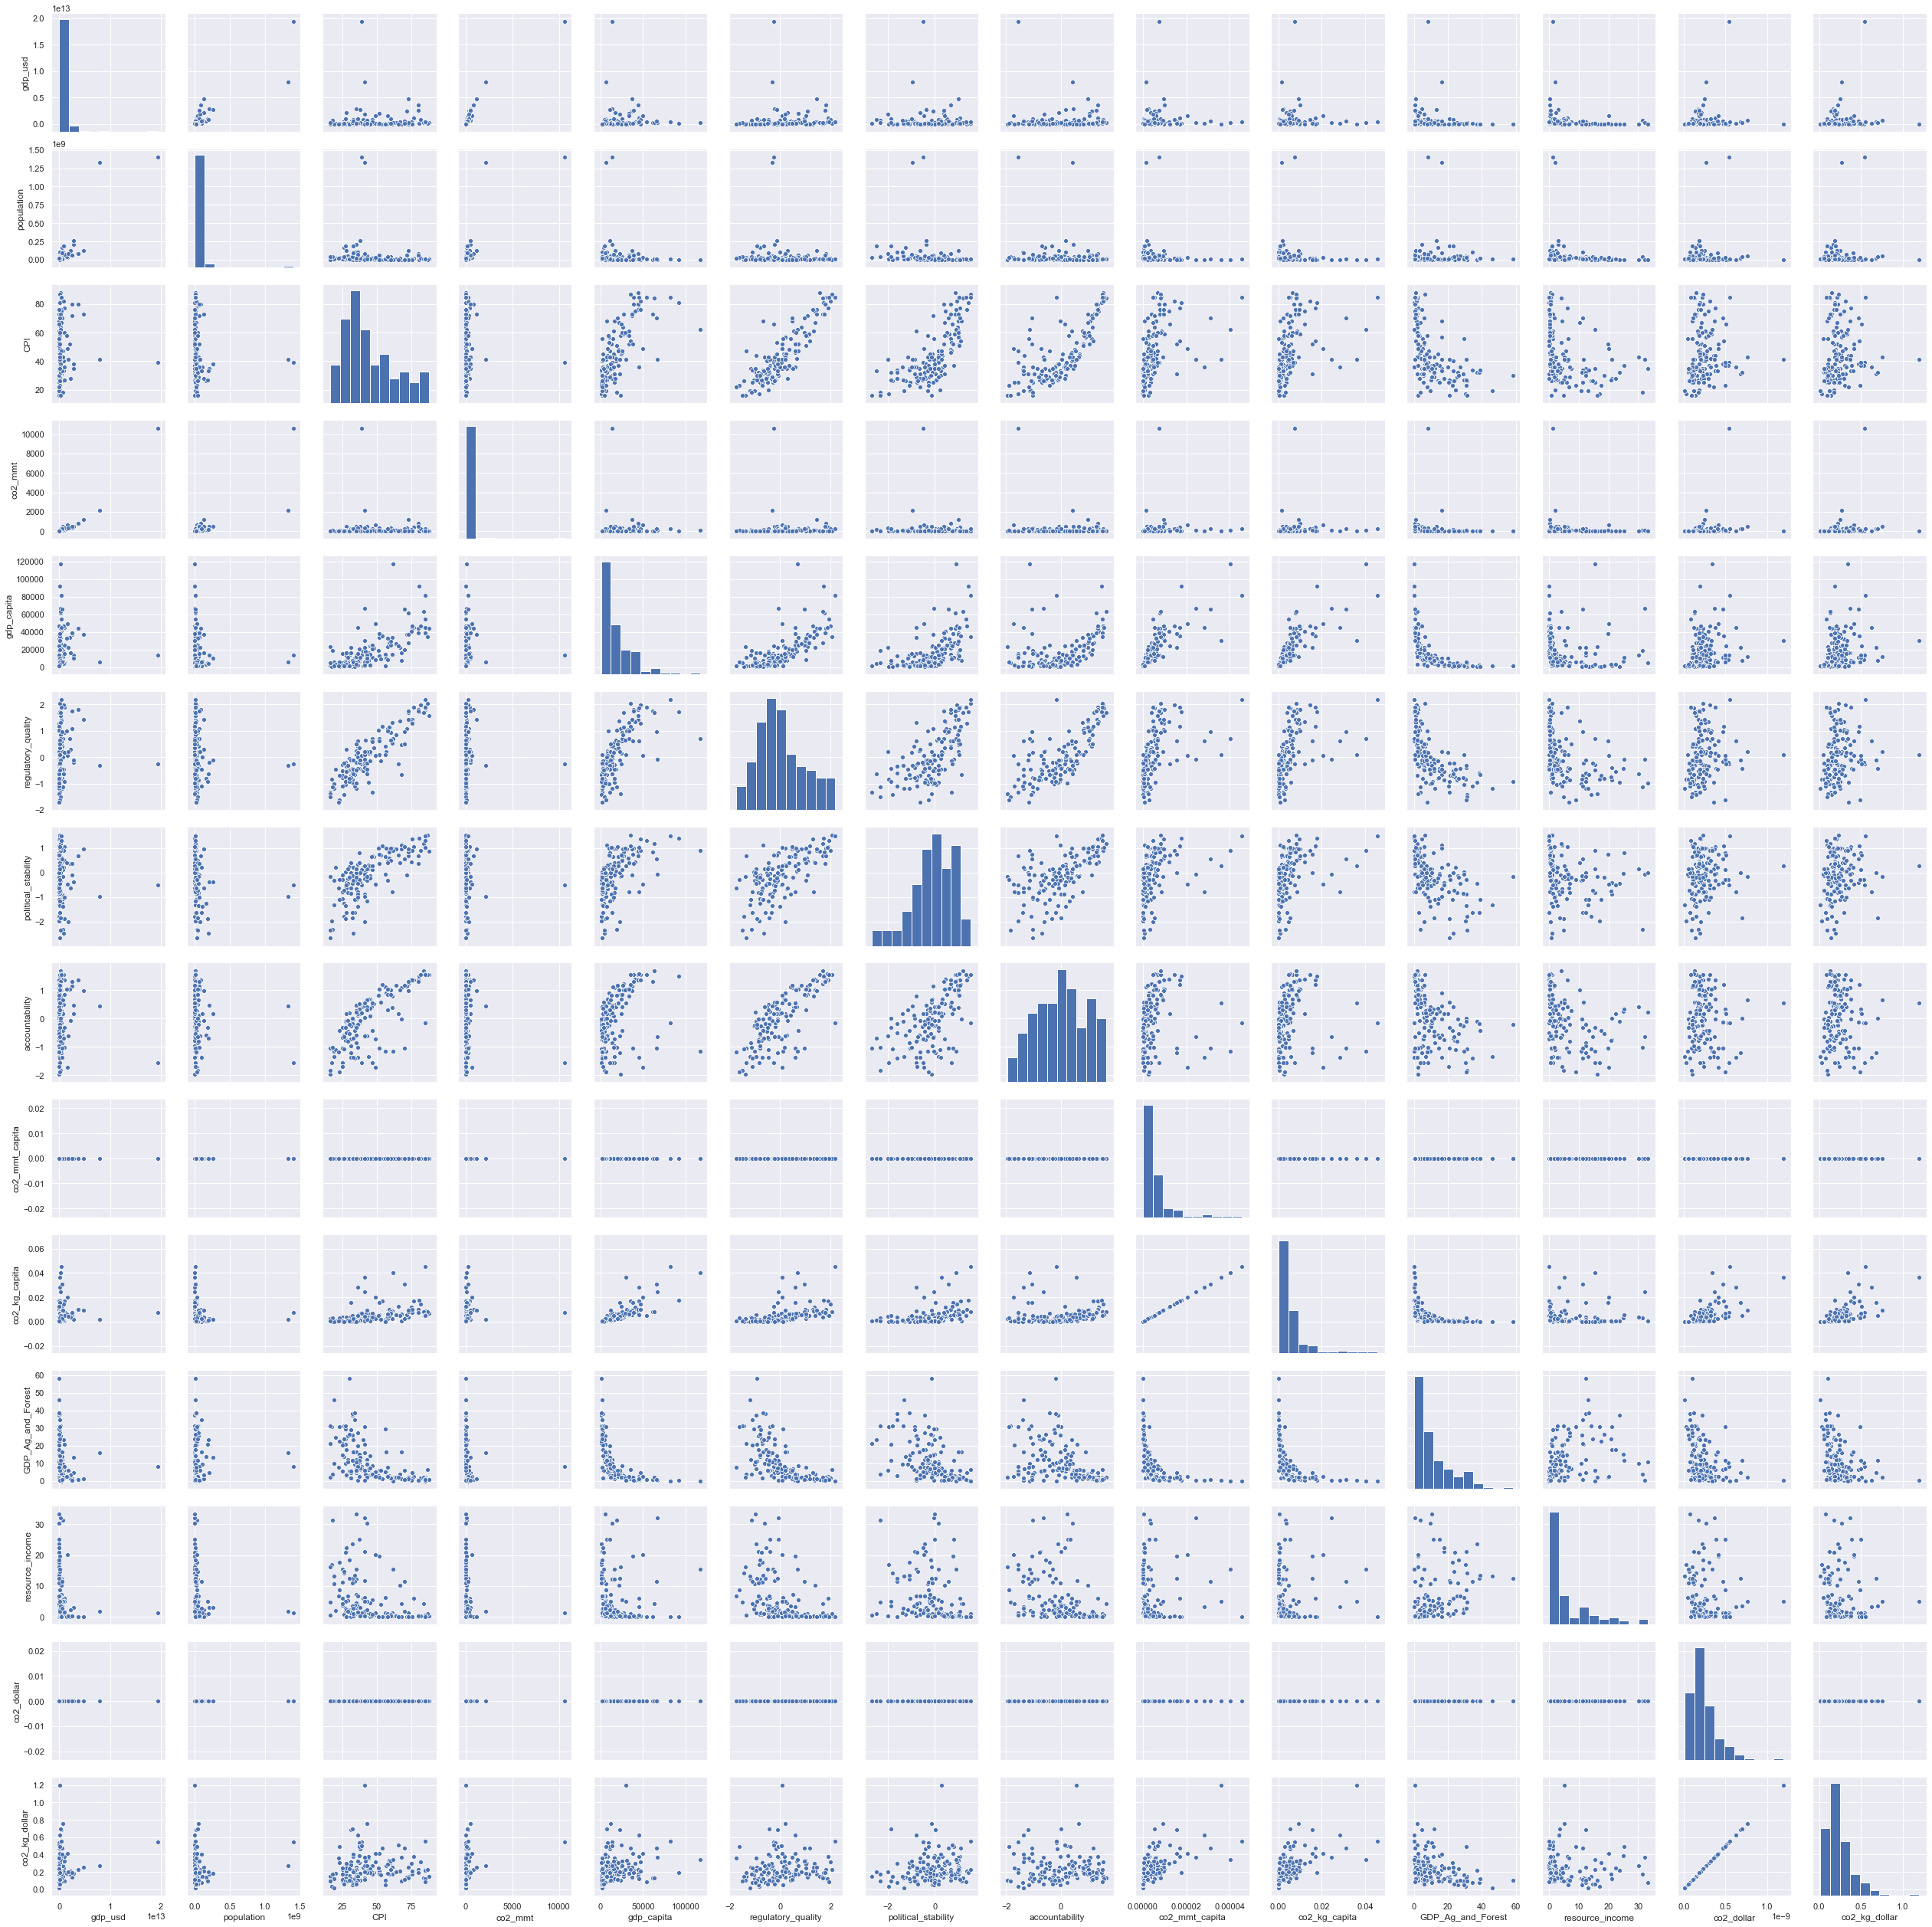

In [68]:
sns.pairplot(sub) 
# sub.head()

In [ ]:
'co2_mmt','co2_kg_capita','co2_kg_dollar'

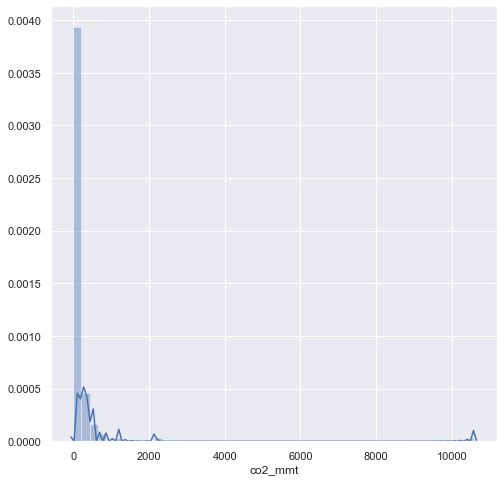

In [98]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(merged['co2_mmt'],ax=ax)

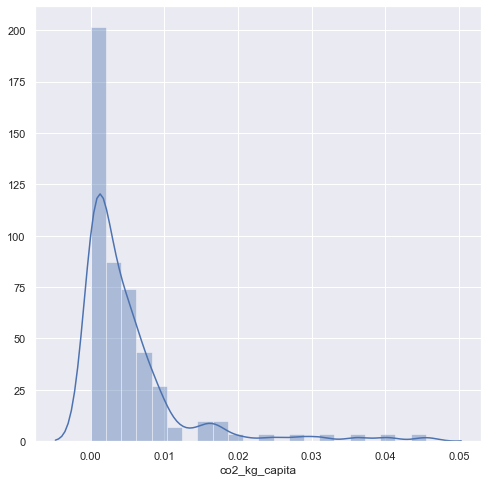

In [99]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(merged['co2_kg_capita'], ax=ax)

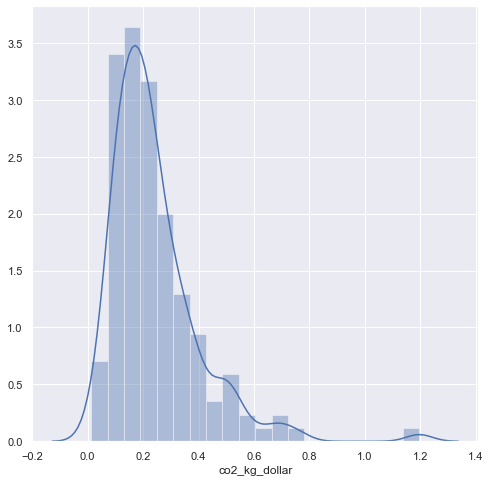

In [97]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(merged['co2_kg_dollar'], ax=ax) # efficiency

In [100]:
merged.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law', 'co2_mmt_capita', 'co2_kg_capita',
       'GDP_Ag_and_Forest', 'petro_income', 'resource_income', 'co2_dollar',
       'co2_kg_dollar'],
      dtype='object')

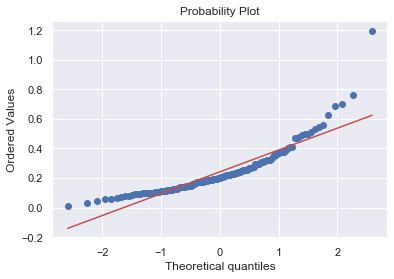

In [104]:
import pylab 
import scipy.stats as stats

# measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(merged['co2_kg_dollar'], dist="norm", plot=pylab)
pylab.show()

# end of exploration pt. 1

## next part: Kyle's notebook with initial linear testing, and then we'll take it from there